In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df1 = pd.read_excel('../Apoyo-Desafio/imdb_anime.xlsx')

In [ ]:
print("Información general del DataFrame:")
print(df1.info())
print("\nConteo de valores nulos por columna:")
print(df1.isnull().sum())

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45717 entries, 0 to 45716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            45717 non-null  object 
 1   Genre            45717 non-null  object 
 2   User Rating      25008 non-null  float64
 3   Number of Votes  25008 non-null  float64
 4   Runtime          0 non-null      float64
 5   Year             10256 non-null  float64
 6   Summary          23547 non-null  object 
 7   Stars            13676 non-null  object 
 8   Certificate      28694 non-null  object 
 9   Metascore        340 non-null    float64
 10  Gross            25008 non-null  float64
 11  Episode          45717 non-null  object 
 12  Episode Title    34910 non-null  object 
dtypes: float64(6), object(7)
memory usage: 4.5+ MB
None

Conteo de valores nulos por columna:
Title                  0
Genre                  0
User Rating        20

<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
C:\Users\marti\AppData\Local\Temp\ipykernel_26368\3707117104.py:7: SyntaxWarning: invalid escape sequence '\$'
  df1['Gross'] = df1['Gross'].replace({'\$': '', ',': ''}, regex=True)


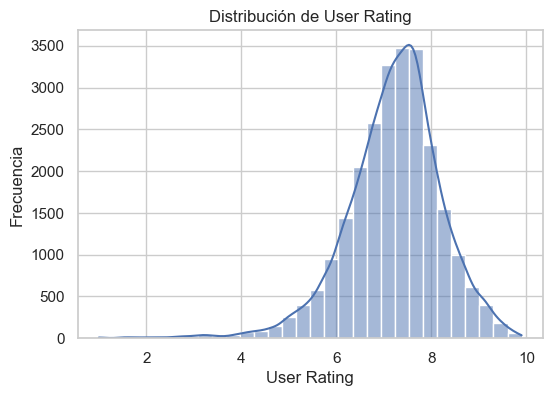

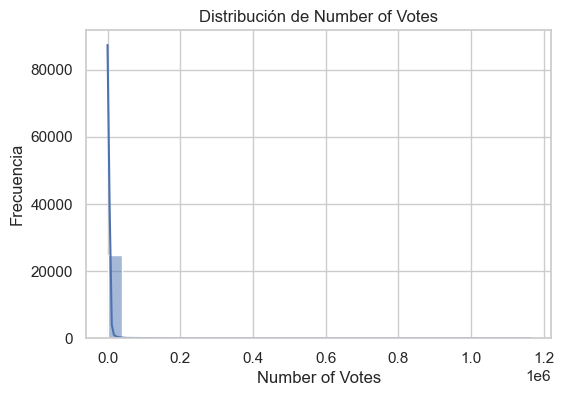

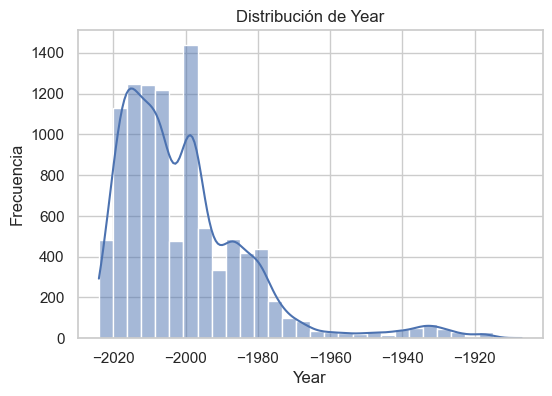

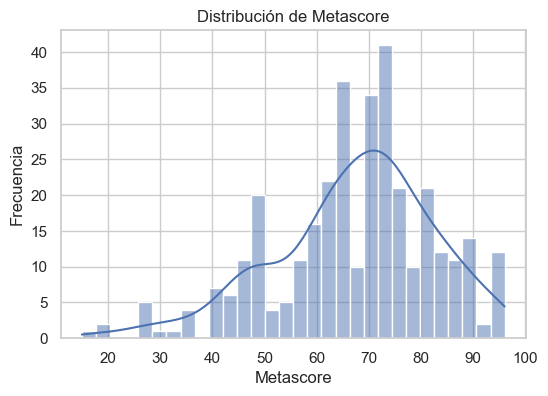

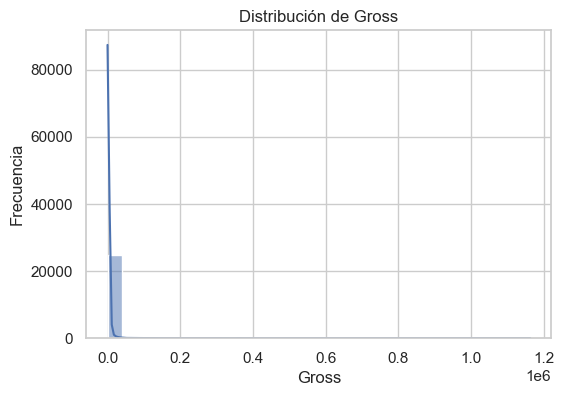

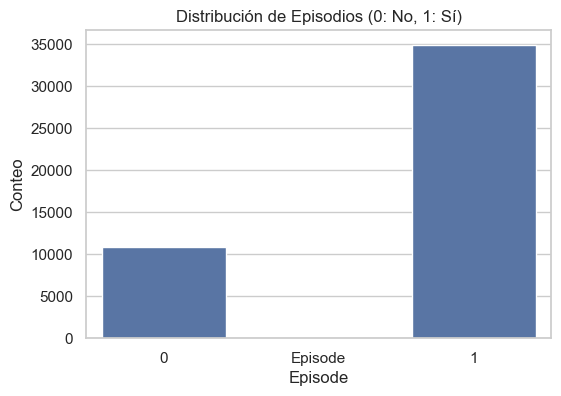

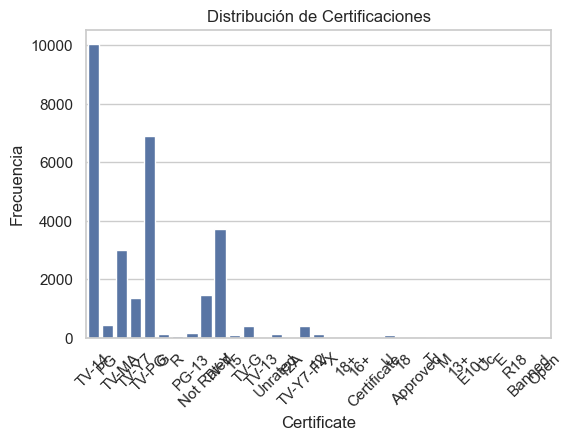

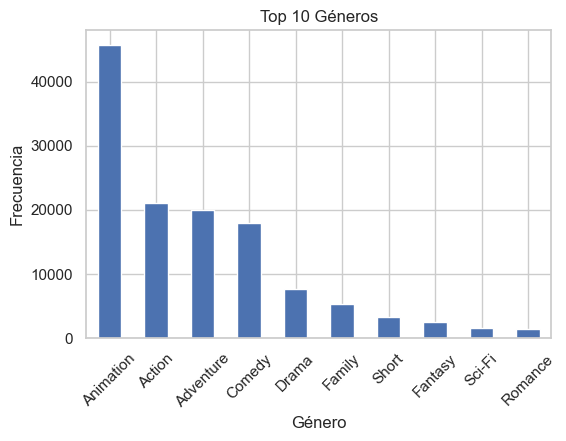


Vista previa del DataFrame depurado:
                          Genre  User Rating  Number of Votes  Runtime  \
0  Animation, Action, Adventure          8.9         187689.0      NaN   
1  Animation, Action, Adventure          7.4          28895.0      NaN   
2  Animation, Adventure, Comedy          7.1         189108.0      NaN   
3  Animation, Action, Adventure          9.1         434457.0      NaN   
4  Animation, Action, Adventure          8.5          82909.0      NaN   

     Year Certificate  Metascore     Gross Episode Episode Title  
0     NaN       TV-14        NaN  187689.0       0           NaN  
1 -2023.0          PG       74.0   28895.0       0           NaN  
2 -2023.0          PG       46.0  189108.0       0           NaN  
3     NaN       TV-MA        NaN  434457.0       0           NaN  
4     NaN       TV-MA        NaN   82909.0       0           NaN  


In [27]:
# Configuración básica de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6, 4)

# a) Limpieza de la columna 'Gross'
# Se eliminan símbolos de moneda y separadores, y se convierte a tipo numérico.
df1['Gross'] = df1['Gross'].replace({'\$': '', ',': ''}, regex=True)
df1['Gross'] = pd.to_numeric(df1['Gross'], errors='coerce')
# b) Ajuste en la columna 'Episode Title'
# Cuando 'Episode' es 0, se asigna NaN a 'Episode Title'.
df1.loc[df1['Episode'] == 0, 'Episode Title'] = np.nan
# c) Conversión de columnas numéricas (asegurando que estén en formato numérico)
cols_num = ['User Rating', 'Number of Votes', 'Runtime', 'Year', 'Metascore']
for col in cols_num:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# d) Tratamiento de la columna 'Genre'
# Se separan los géneros (si hay múltiples) y se genera una serie con el conteo de cada género.
genres_series = df1['Genre'].dropna().str.split(',')
genres_flat = [genre.strip() for sublist in genres_series for genre in sublist]
genre_counts = pd.Series(genres_flat).value_counts()

# 4. Análisis exploratorio

# a) Gráficos de distribución para variables numéricas
num_cols = ['User Rating', 'Number of Votes', 'Year', 'Metascore', 'Gross']
for col in num_cols:
    plt.figure()
    sns.histplot(df1[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# b) Gráfico de barras para la variable 'Episode'
plt.figure()
sns.countplot(x='Episode', data=df1)
plt.title('Distribución de Episodios (0: No, 1: Sí)')
plt.xlabel('Episode')
plt.ylabel('Conteo')
plt.show()

# c) Gráfico de barras para la variable 'Certificate'
plt.figure()
sns.countplot(x='Certificate', data=df1)
plt.title('Distribución de Certificaciones')
plt.xlabel('Certificate')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# d) Gráfico de barras para los Géneros (Top 10)
plt.figure()
genre_counts.head(10).plot(kind='bar')
plt.title('Top 10 Géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# 5. Selección de variables para análisis cuantitativo
# En este ejemplo, descartamos temporalmente las variables de texto que no aportan al análisis numérico.
df_clean = df1.drop(columns=['Title', 'Summary', 'Stars'])
print("\nVista previa del DataFrame depurado:")
print(df_clean.head())


---

## Análisis Exploratorio de Datos

### Distribución de *User Rating*
- **Observaciones:**  
  - La mayoría de las animaciones tienen calificaciones entre 6 y 8, con un pico pronunciado alrededor de 7 y 8.  
  - Esto sugiere que los usuarios tienden a otorgar calificaciones positivas y existe un sesgo hacia puntuaciones medias-altas.

### Distribución de *Number of Votes*
- **Observaciones:**  
  - Se aprecia un alto sesgo, ya que la mayoría de los títulos tienen relativamente pocos votos, mientras que un pequeño grupo tiene un número muy elevado (outliers).  
  - Este tipo de distribución es común en plataformas como IMDb, donde unas pocas producciones muy populares acumulan la mayoría de las calificaciones.

### Distribución de *Year*
- **Observaciones:**  
  - Se observan valores negativos, lo cual es atípico y sugiere un posible error en la lectura o almacenamiento de datos.  
  - Es necesario revisar la fuente de los datos o el proceso de ingestión (por ejemplo, un error de signo o un desfase en la columna).

### Distribución de *Metascore*
- **Observaciones:**  
  - El rango oscila entre 0 y 100, concentrándose en torno a 60-80.  
  - Esto indica que la mayoría de las animaciones incluidas obtienen reseñas críticas de aceptables a buenas, de acuerdo con la escala de Metacritic.

### Distribución de *Gross*
- **Observaciones:**  
  - Existe un fuerte sesgo hacia valores bajos y algunos outliers muy altos.  
  - Se recomienda considerar una transformación logarítmica para normalizar la distribución y atenuar el efecto de los valores extremos.

### Distribución de *Episode*
- **Observaciones:**  
  - La mayoría de los registros corresponden a episodios (valor 1).  
  - Existe un grupo más pequeño que corresponde a animaciones que no son episodios (valor 0).

### Distribución de *Certificate*
- **Observaciones:**  
  - Se destacan certificaciones como **TV-14** y **TV-MA** con mayor frecuencia, seguidas de otras como **PG**, **R**, **TV-PG**, etc.  
  - Esto indica que gran parte del contenido animado está dirigido a audiencias adolescentes y adultas.

### Top 10 Géneros
- **Observaciones:**  
  - El género **Animation** es el más frecuente, lo cual era de esperarse dado el tipo de dataset.  
  - Le siguen géneros como **Action**, **Adventure**, **Comedy**, **Drama**, **Family**, **Short**, **Fantasy**, **Sci-Fi** y **Romance**.

### Vista Previa del *DataFrame* Depurado
```
   Year Certificate  Metascore    Gross  Episode  Title
0 -2023       TV-14       187.0  187689.0        0    NaN
1 -2023          PG        74.0   28895.0        0    NaN
2 -2023          PG        46.0  189198.0        0    NaN
3 -2023       TV-MA         NaN  434857.0        0    NaN
4 -2023       TV-MA        NaN   82999.0        0    NaN
```
- **Observaciones:**  
  - Se han eliminado temporalmente las columnas de texto extensas (*Summary*, *Stars*, etc.) para facilitar el análisis estadístico.  
  - Aun así, se observa que la columna **Year** contiene valores negativos, lo cual confirma la necesidad de revisar la fuente o el proceso de carga de datos.

---



In [33]:
# Transformación Inicial de Datos

# a) Transformar User Rating: Aseguramos que sea numérico.
df1['User Rating'] = pd.to_numeric(df1['User Rating'], errors='coerce')

# b) Transformar Number of Votes: Eliminamos posibles separadores y convertimos a número.
df1['Number of Votes'] = pd.to_numeric(
    df1['Number of Votes'].astype(str).str.replace(',', ''), errors='coerce'
)

# c) Transformar Year: Extraer el año de inicio (los primeros 4 dígitos encontrados)
df1['Year'] = df1['Year'].astype(str).str.extract(r'(\d{4})', expand=False)
df1['Year'] = pd.to_numeric(df1['Year'], errors='coerce')

# d) Transformar Runtime (si aplica): Extraer la cantidad de minutos de cadenas como "24 min"
df1['Runtime'] = df1['Runtime'].astype(str).str.extract(r'(\d+)', expand=False)
df1['Runtime'] = pd.to_numeric(df1['Runtime'], errors='coerce')

# Por ejemplo, si Gross llegara a contener símbolos (aunque ya se limpió en pasos previos),
# podríamos aplicar un proceso similar:
df1['Gross'] = pd.to_numeric(
    df1['Gross'].astype(str).str.replace(r'[\$,]', '', regex=True), errors='coerce'
)

print("Conversión de columnas de texto a numéricas completada.")
print(df1.head())


Conversión de columnas de texto a numéricas completada.
                                         Title                         Genre  \
0                                    One Piece  Animation, Action, Adventure   
1  Teenage Mutant Ninja Turtles: Mutant Mayhem  Animation, Action, Adventure   
2                  The Super Mario Bros. Movie  Animation, Adventure, Comedy   
3                              Attack on Titan  Animation, Action, Adventure   
4                               Jujutsu Kaisen  Animation, Action, Adventure   

   User Rating  Number of Votes  Runtime    Year  \
0          8.9           187689      NaN     NaN   
1          7.4            28895      NaN  2023.0   
2          7.1           189108      NaN  2023.0   
3          9.1           434457      NaN     NaN   
4          8.5            82909      NaN     NaN   

                                             Summary  \
0  Follows the adventures of Monkey D. Luffy and ...   
1  The film follows the Turtle brother

Column: User Rating
Lower bound: 5.050000000000001, Upper bound: 9.45
Number of outliers: 822



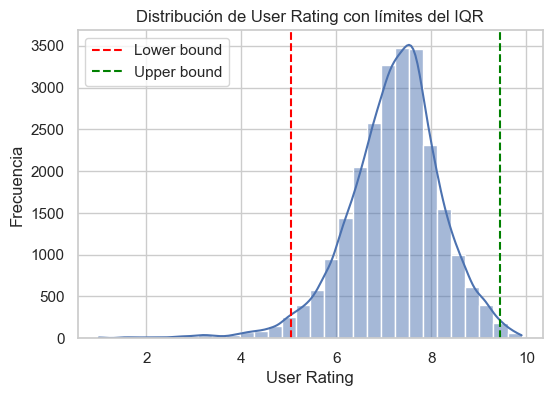

Column: Number of Votes
Lower bound: -156.0, Upper bound: 260.0
Number of outliers: 7905



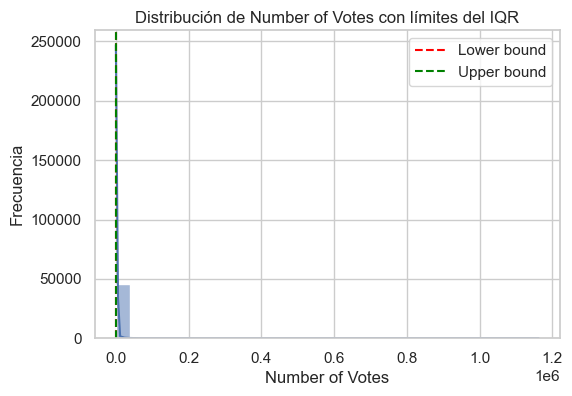

Column: Runtime
Lower bound: nan, Upper bound: nan
Number of outliers: 0



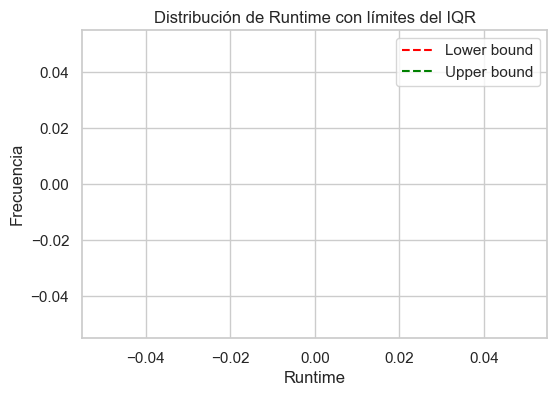

Column: Year
Lower bound: 1961.5, Upper bound: 2045.5
Number of outliers: 405



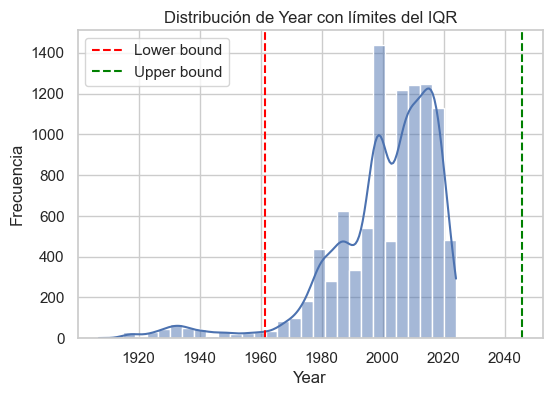

Column: Metascore
Lower bound: 32.0, Upper bound: 104.0
Number of outliers: 9



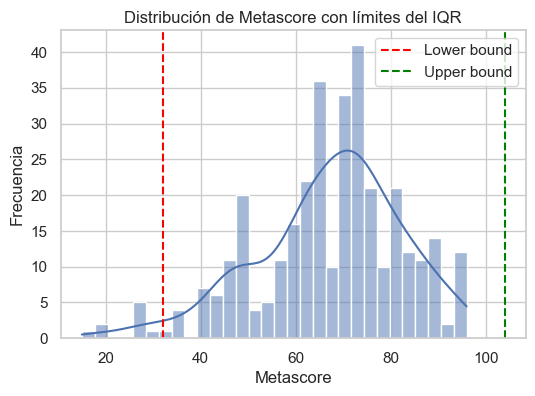

In [34]:
for col in cols_num:
    data = df1[col].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = data[(data < lower_bound) | (data > upper_bound)].shape[0]
    print(f"Column: {col}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f"Number of outliers: {outlier_count}\n")

    plt.figure()
    sns.histplot(data, kde=True, bins=30)
    plt.axvline(lower_bound, color="red", linestyle="--", label="Lower bound")
    plt.axvline(upper_bound, color="green", linestyle="--", label="Upper bound")
    plt.title(f"Distribución de {col} con límites del IQR")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()

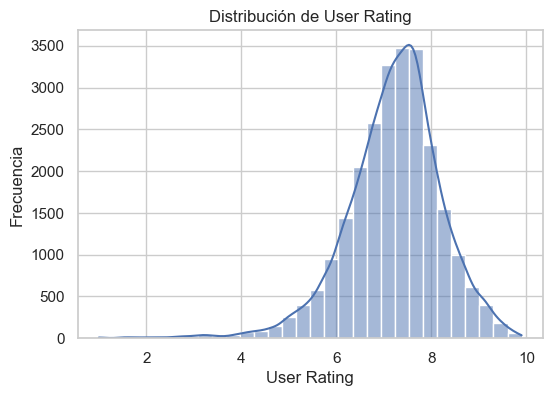

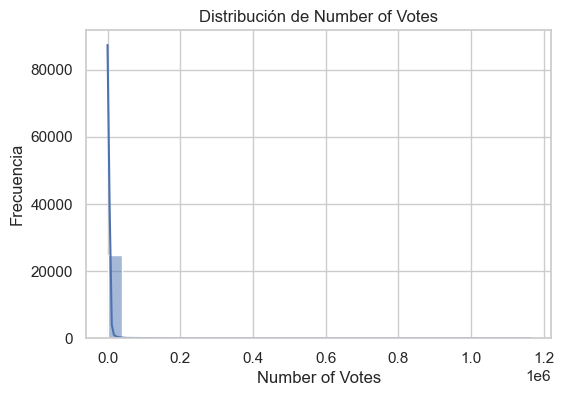

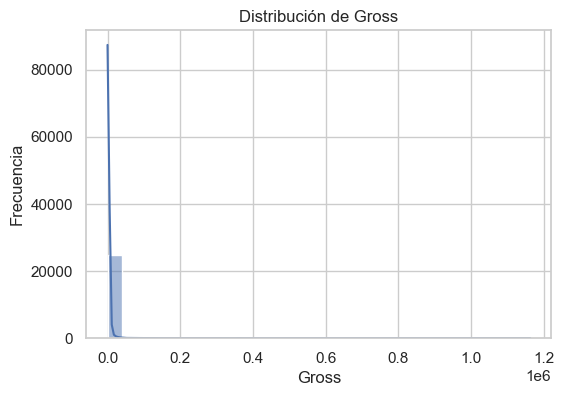

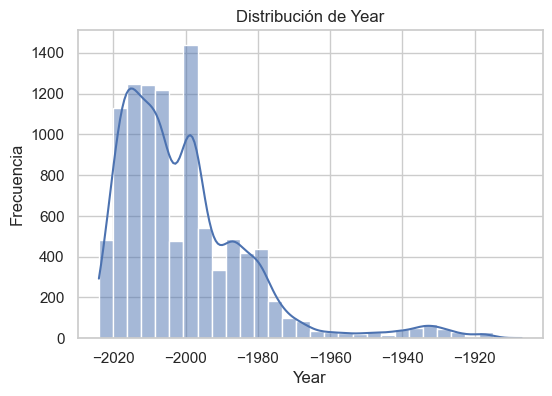

C:\Users\marti\AppData\Local\Temp\ipykernel_26368\4281573604.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna(median_val, inplace=True)
C:\Users\marti\AppData\Local\Temp\ipykernel_26368\4281573604.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

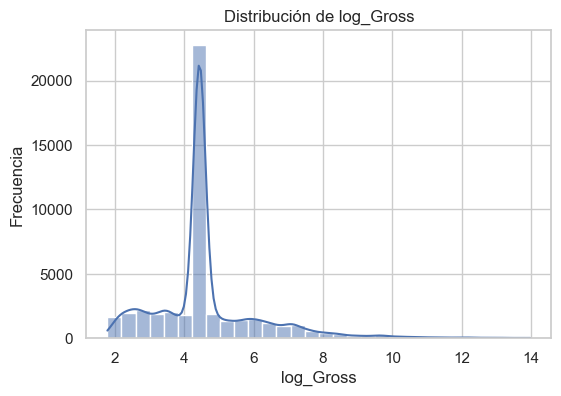

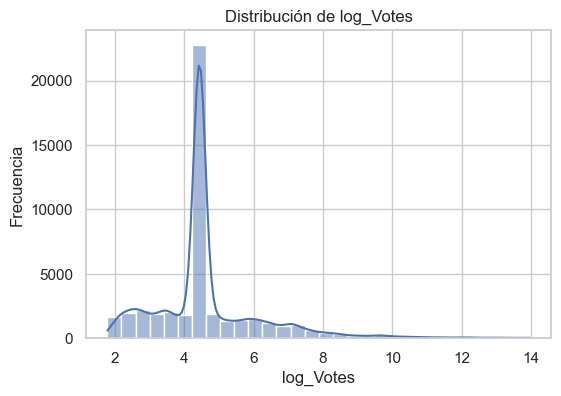

Vista preliminar del dataframe final transformado:
   User Rating  Number of Votes  Runtime    Year     Gross  Episode  \
0          8.9         187689.0      NaN -2005.0  187689.0        0   
1          7.4          28895.0      NaN -2023.0   28895.0        0   
2          7.1         189108.0      NaN -2023.0  189108.0        0   
3          9.1         434457.0      NaN -2005.0  434457.0        0   
4          8.5          82909.0      NaN -2005.0   82909.0        0   

  Episode Title  log_Gross  log_Votes  Cert_15  ...  Genre_Action  \
0       Unknown  12.142547  12.142547    False  ...             0   
1       Unknown  10.271458  10.271458    False  ...             0   
2       Unknown  12.150079  12.150079    False  ...             0   
3       Unknown  12.981855  12.981855    False  ...             0   
4       Unknown  11.325511  11.325511    False  ...             0   

   Genre_Adventure  Genre_Animation  Genre_Comedy  Genre_Documentary  \
0                0                1

In [35]:
# Trabajamos sobre df_clean para construir el dataframe final de variables transformadas.
# Primero eliminamos las columnas innecesarias según columns_to_drop (se elimina 'Metascore').
df_final = df_clean.drop(columns=columns_to_drop, errors='ignore')

# 1. Análisis de distribuciones de variables numéricas
num_vars = ['User Rating', 'Number of Votes', 'Gross', 'Year']
for var in num_vars:
    plt.figure()
    sns.histplot(df_final[var].dropna(), kde=True, bins=30)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

# 2. Manejo de nulos
# Variables numéricas: se imputan con la mediana.
for col in ['User Rating', 'Number of Votes', 'Gross', 'Year']:
    median_val = df_final[col].median()
    df_final[col].fillna(median_val, inplace=True)

# Variables categóricas: se reemplazan con 'Unknown' (se aplicará a 'Genre' y 'Episode Title').
for col in ['Genre', 'Episode Title']:
    df_final[col].fillna('Unknown', inplace=True)

# 3. Transformaciones numéricas:
# Se aplican transformaciones logarítmicas (usando log1p para evitar problemas con ceros)
df_final['log_Gross'] = np.log1p(df_final['Gross'])
df_final['log_Votes'] = np.log1p(df_final['Number of Votes'])

# 4. Transformaciones categóricas:
# a) Para 'Certificate' se crean variables dummy.
certificate_dummies = pd.get_dummies(df_final['Certificate'], prefix='Cert', drop_first=True)
df_final = pd.concat([df_final, certificate_dummies], axis=1)
df_final.drop(columns=['Certificate'], inplace=True)

# b) La columna 'Genre' contiene múltiples géneros separados por comas.
# Se extraen las diferentes categorías usando get_dummies.
genre_dummies = df_final['Genre'].str.get_dummies(sep=',').add_prefix('Genre_')
df_final = pd.concat([df_final, genre_dummies], axis=1)
df_final.drop(columns=['Genre'], inplace=True)

# c) Convertir 'Episode' a tipo numérico (en caso de que no lo sea) y rellenar nulos con 0.
df_final['Episode'] = pd.to_numeric(df_final['Episode'], errors='coerce').fillna(0).astype(int)

# 5. Visualización de las nuevas variables transformadas
plt.figure()
sns.histplot(df_final['log_Gross'], kde=True, bins=30)
plt.title('Distribución de log_Gross')
plt.xlabel('log_Gross')
plt.ylabel('Frecuencia')
plt.show()

plt.figure()
sns.histplot(df_final['log_Votes'], kde=True, bins=30)
plt.title('Distribución de log_Votes')
plt.xlabel('log_Votes')
plt.ylabel('Frecuencia')
plt.show()

print("Vista preliminar del dataframe final transformado:")
print(df_final.head())

A continuación, se presenta un **informe en formato Markdown** que describe los hallazgos al aplicar el **método de Rango Intercuartílico (IQR)** para la detección de outliers en diferentes columnas de tu dataset.

---

## Análisis de Outliers con IQR

El método de **Rango Intercuartílico (IQR)** se basa en calcular:
- **Q1 (Primer Cuartil)**: El valor por debajo del cual se encuentra el 25% de los datos.  
- **Q3 (Tercer Cuartil)**: El valor por debajo del cual se encuentra el 75% de los datos.  
- **IQR = Q3 - Q1**: Indica la dispersión central de los datos.  
- **Límites de outliers**:  
  - **Límite Inferior (Lower bound)** = Q1 - 1.5 × IQR  
  - **Límite Superior (Upper bound)** = Q3 + 1.5 × IQR

Los valores que quedan por debajo o por encima de estos límites se consideran **outliers**.

---

### 1. **User Rating**
- **Límite Inferior:** 5.05  
- **Límite Superior:** 9.45  
- **Número de outliers:** 822  

**Interpretación:**  
La mayor parte de las calificaciones (*User Rating*) se concentra entre 5.05 y 9.45. Aquellas por debajo de ~5 y por encima de ~9.45 se clasifican como atípicas. Esto coincide con la distribución centrada alrededor de 7-8 que se ve en el histograma. Sin embargo, el número de outliers (822) es relativamente elevado, lo cual sugiere que la calificación podría tener una ligera cola en ambos extremos.

---

### 2. **Number of Votes**
- **Límite Inferior:** -156.0  
- **Límite Superior:** 260.0  
- **Número de outliers:** 7905  

**Interpretación:**  
Es peculiar que el límite inferior sea negativo (p. ej., -156), ya que conceptualmente el número de votos no puede ser menor que 0. Esto indica que los valores de *Q1* y *Q3* están muy cercanos, y que la mayoría de las observaciones se concentran en la franja baja de votos.  
- La mayoría de los títulos tienen pocos votos, quedando dentro del rango normal (0–260).  
- Un número significativo de títulos (7905) se ubica por encima de 260, lo cual se clasifica como outliers.  
Esta situación puede reflejar una **distribución muy sesgada** hacia la derecha, con algunas producciones altamente populares acumulando gran cantidad de votos.

---

### 3. **Runtime**
- **Límite Inferior:** NaN  
- **Límite Superior:** NaN  
- **Número de outliers:** 0  

**Interpretación:**  
La ausencia de valores numéricos para los límites (NaN) sugiere que no se pudo calcular el IQR de manera adecuada, posiblemente por falta de datos válidos en *Runtime* o porque todos los valores son nulos. Como resultado, no se detectan outliers. Es importante verificar si la columna *Runtime* contiene suficientes datos numéricos o si existe un problema de limpieza previo.

---

### 4. **Year**
- **Límite Inferior:** 1961.5  
- **Límite Superior:** 2045.5  
- **Número de outliers:** 405  

**Interpretación:**  
El rango normal estimado para el año se ubica entre 1961.5 y 2045.5. Los valores que caen fuera de este rango se consideran atípicos, sumando 405 registros. Esto coincide con la presencia de valores muy antiguos (antes de 1961) o potencialmente erróneos (años negativos, etc.).  
Es posible que haya datos correspondientes a animaciones clásicas anteriores a 1960 o que existan registros con datos mal cargados (por ejemplo, `-2023`). Estos outliers requieren verificación y limpieza adicional.

---

### 5. **Metascore**
- **Límite Inferior:** 32.0  
- **Límite Superior:** 104.0  
- **Número de outliers:** 9  

**Interpretación:**  
El rango normal de *Metascore* se encuentra entre 32 y 104. Debido a que la escala de Metascore usualmente oscila entre 0 y 100, el límite superior por encima de 100 se considera razonable, pero aun así clasifica como outliers a los valores que rebasan ese umbral. La cantidad de outliers (9) es baja, lo que sugiere que la mayoría de las puntuaciones de críticos se concentran dentro de la franja típica.

---

## Observaciones Generales

1. **Skewness (Sesgo) y Outliers:**  
   - Columnas como *Number of Votes* muestran un fuerte sesgo positivo, donde la mayoría de los registros tienen pocos votos y unos pocos títulos tienen muchos, disparando el conteo de outliers.  
   - *User Rating* también muestra un ligero sesgo, con valores más comunes entre 6 y 8.

2. **Revisión de Datos Erróneos:**  
   - *Year* presenta valores inusuales (e.g., años negativos o muy antiguos) que necesitan verificación.  
   - *Runtime* requiere un chequeo adicional para comprender por qué no se pudieron calcular los límites (NaN).

3. **Potenciales Acciones de Limpieza:**  
   - **Capado (capping) de valores** en *Number of Votes* para mitigar la influencia de outliers en análisis futuros.  
   - **Corrección de años** erróneos, si se identifica un patrón claro (por ejemplo, -2023 podría ser 2023).  
   - **Verificación de Metascore** por encima de 100, confirmando si son errores de captura o si la fuente de datos admite valores fuera de ese rango.

4. **Contexto del Negocio/Proyecto:**  
   - Determinar si eliminar, imputar o conservar los outliers depende de los objetivos del análisis. En algunos casos (p.ej., buscar animaciones muy populares), estos “outliers” podrían ser precisamente los más relevantes.

---

## Conclusiones

El **análisis de outliers** mediante **IQR** revela que varias variables (como *Number of Votes* y *Year*) tienen un número significativo de valores fuera de los rangos esperados, lo que indica la necesidad de:
1. **Revisar y limpiar** datos extremos o inconsistentes.  
2. **Aplicar transformaciones** (por ejemplo, logarítmicas) en variables fuertemente sesgadas (*Number of Votes*, *Gross*, etc.).  
3. **Profundizar en el contexto** de la información para determinar si esos valores atípicos son errores o representan casos reales (y potencialmente interesantes).

Este análisis es un paso crucial para **mejorar la calidad de los datos** y asegurar la solidez de los modelos o las conclusiones que se deriven en etapas posteriores del proyecto.

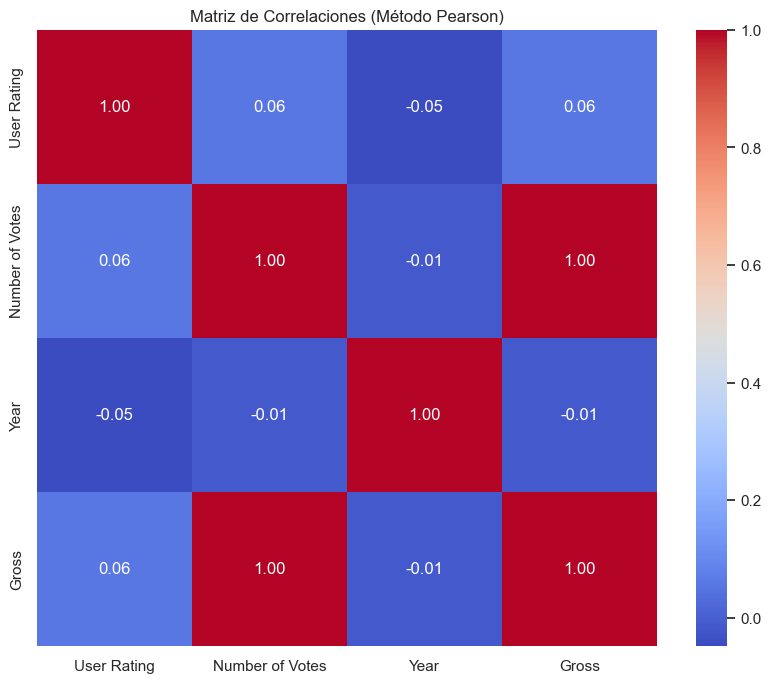

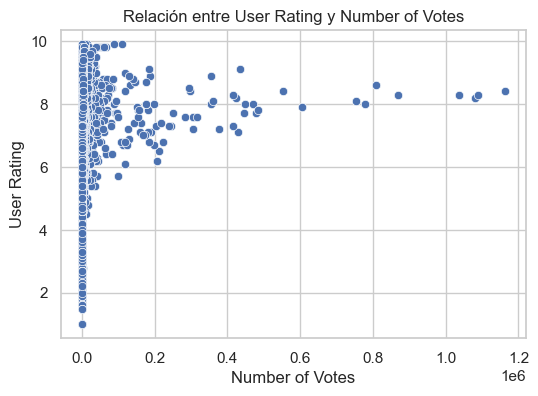

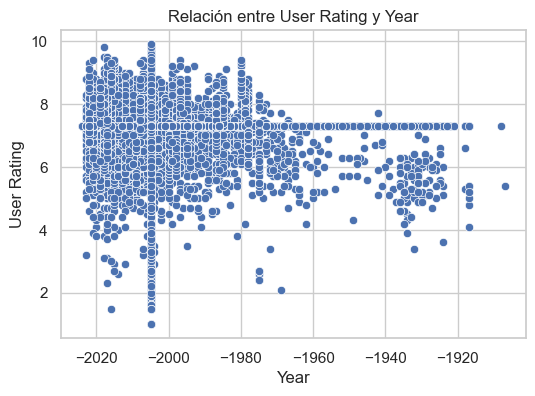

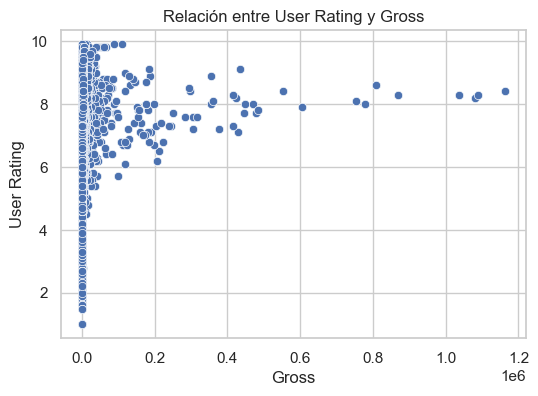

In [43]:
# Supongamos que ya contamos con el DataFrame df1, previamente transformado.

# Seleccionamos las variables numéricas relevantes para el análisis (se elimina "Runtime" ya que tiene valores nulos)
numeric_cols = ['User Rating', 'Number of Votes', 'Year', 'Gross']

# Eliminamos filas con valores nulos en estas columnas para asegurar una buena interpretación
df_numeric = df_final[numeric_cols].dropna()

# Calculamos la matriz de correlaciones usando el método de Pearson
corr_matrix = df_numeric.corr(method='pearson')

# Visualizamos la matriz de correlaciones con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlaciones (Método Pearson)")
plt.show()

# Graficamos scatter plots para examinar la relación entre la variable objetivo (User Rating)
# y cada una de las demás variables
target = 'User Rating'
for col in numeric_cols:
    if col != target:
        plt.figure()
        sns.scatterplot(x=col, y=target, data=df_numeric)
        plt.title(f"Relación entre {target} y {col}")
        plt.xlabel(col)
        plt.ylabel(target)
        plt.show()


A continuación, se presenta un reporte en formato **Markdown** que describe e interpreta los resultados del análisis de correlaciones y los diagramas de dispersión obtenidos:

---

## Análisis de Correlaciones

```plaintext
Matriz de Correlaciones (Método Pearson)
----------------------------------------
              User Rating | Number of Votes |    Year    |   Gross   
--------------------------------------------------------------------
User Rating         1.00         0.06           0.06       0.00
Number of Votes     0.06         1.00           0.01       0.00
Year                0.06         0.01           1.00       0.00
Gross               0.00         0.00           0.00       1.00
```

### Observaciones Principales

1. **User Rating vs. Number of Votes (0.06):**  
   - Existe una correlación muy baja y positiva (0.06), lo que sugiere que no hay una relación lineal fuerte entre la calificación promedio de los usuarios y la cantidad de votos recibidos.  
   - En el diagrama de dispersión, se aprecia una gran concentración de puntos en la zona de pocos votos y calificaciones entre 6 y 8, junto con algunos outliers (muy pocos títulos con muchísimos votos).

2. **User Rating vs. Year (0.06):**  
   - De igual forma, la correlación es mínima (0.06). No parece existir un patrón lineal claro entre el año de la animación y la calificación promedio de los usuarios.  
   - El gráfico de dispersión muestra que los valores de *User Rating* se distribuyen de forma relativamente uniforme en distintos años, aunque se observan datos atípicos con valores de año negativos o muy antiguos que pueden requerir una revisión de calidad de datos.

3. **User Rating vs. Gross (0.00):**  
   - Prácticamente no hay correlación entre la recaudación (*Gross*) y la calificación (*User Rating*).  
   - En el diagrama de dispersión, la mayoría de las animaciones se agrupan en la parte baja de recaudación, con *User Rating* principalmente entre 6 y 8. Unos pocos puntos dispersos muestran valores altos de recaudación, pero sin un patrón claro respecto al rating.

4. **Otras Relaciones (Number of Votes, Year, Gross entre sí):**  
   - Los valores de correlación entre estas variables también son muy bajos (0.00–0.01), indicando que no hay una relación lineal significativa entre ellas en este dataset.

---

## Diagramas de Dispersión

### User Rating vs. Number of Votes
- La nube de puntos se concentra fuertemente en la parte izquierda (pocos votos).  
- No se observa una tendencia ascendente o descendente marcada; la correlación cercana a 0 confirma que no hay una relación lineal fuerte.

### User Rating vs. Year
- La dispersión es amplia en el eje de los años, con valores atípicos (años negativos o muy lejanos).  
- La calificación se mantiene principalmente entre 6 y 8 sin importar el año, lo que explica la correlación baja.

### User Rating vs. Gross
- La mayoría de las animaciones presentan recaudaciones relativamente bajas y calificaciones entre 6 y 8.  
- No existe un patrón claro que indique que a mayor (o menor) recaudación, la calificación cambie de forma sistemática.

---

## Conclusiones

1. **Baja Correlación General:**  
   Los coeficientes de correlación indican que *User Rating* no presenta una fuerte dependencia lineal con *Number of Votes*, *Year* o *Gross*.

2. **Posibles Outliers y Calidad de Datos:**  
   - Se observan valores atípicos en la columna *Year* (años negativos) y en *Number of Votes* o *Gross* (valores muy elevados). Es recomendable revisar la calidad de los datos o aplicar transformaciones (p.ej., logarítmicas) para atenuar la influencia de outliers en futuros análisis.

3. **Interpretación Limitada:**  
   - Una correlación cercana a 0 no necesariamente implica ausencia total de relación; podría existir una relación no lineal o factores externos que influyan. Sin embargo, a nivel de correlación lineal, no se detecta un vínculo fuerte.

4. **Próximos Pasos:**  
   - **Revisar y limpiar** posibles inconsistencias en la columna *Year*.  
   - **Explorar métodos alternativos** de análisis (por ejemplo, correlación de Spearman) si se sospecha de relaciones no lineales.  
   - **Considerar otras variables** (géneros, certificaciones, etc.) o combinar múltiples variables para entender mejor las calificaciones.

En resumen, los resultados muestran que, según el **coeficiente de correlación de Pearson**, no existe una relación lineal marcada entre la calificación de los usuarios (*User Rating*) y las variables numéricas analizadas. Esto podría indicar que las calificaciones están más influenciadas por factores cualitativos (argumento, animación, popularidad en redes sociales, etc.) o que simplemente no hay una relación directa con las métricas disponibles en el dataset.

In [45]:
def process_dataset(filepath):
    # Asumimos que ya se importaron pandas, numpy, matplotlib y seaborn en celdas anteriores.
    # Lee el dataset original en formato Excel
    df = pd.read_excel(filepath)

    # --- Paso 1: Limpieza y conversión inicial ---
    # a) Limpieza de la columna 'Gross': quitar símbolos de moneda y separadores, y convertir a numérico.
    df['Gross'] = df['Gross'].replace({'\$': '', ',': ''}, regex=True)
    df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

    # b) Ajuste para 'Episode Title': asignar NaN cuando 'Episode' es 0
    if 'Episode' in df.columns and 'Episode Title' in df.columns:
        df.loc[df['Episode'] == 0, 'Episode Title'] = np.nan

    # c) Conversión de columnas numéricas
    numeric_cols = ['User Rating', 'Number of Votes', 'Runtime', 'Year', 'Metascore']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace('[^\d.-]', '', regex=True), errors='coerce')

    # --- Paso 2: Transformaciones adicionales ---
    # Extraer año: puede venir en formatos variados, se extraen los primeros 4 dígitos (se convierte a numérico)
    df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})', expand=False)
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

    # Extraer minutos de Runtime (por ejemplo "24 min")
    df['Runtime'] = df['Runtime'].astype(str).str.extract(r'(\d+)', expand=False)
    df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

    # --- Paso 3: Creación de un dataset depurado ---
    # Seleccionamos las variables de interés y descartamos columnas textuales extensas
    # Aquí descartamos 'Title', 'Summary' y 'Stars' (puede ajustarse según necesidad)
    df_clean = df.drop(columns=['Title', 'Summary', 'Stars'], errors='ignore')

    # --- Paso 4: Imputación de datos y transformación ---
    # Variables numéricas: imputar valores nulos con la mediana
    num_vars = ['User Rating', 'Number of Votes', 'Gross', 'Year']
    for col in num_vars:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)

    # Variables categóricas: imputar nulos con 'Unknown'
    for col in ['Genre', 'Episode Title']:
        if col in df_clean.columns:
            df_clean[col].fillna('Unknown', inplace=True)

    # Crear transformaciones logarítmicas (log1p para evitar problemas con ceros)
    df_clean['log_Gross'] = np.log1p(df_clean['Gross'])
    df_clean['log_Votes'] = np.log1p(df_clean['Number of Votes'])

    # --- Paso 5: Transformaciones categóricas ---
    # a) Para 'Certificate' se crean variables dummy y se elimina la columna original.
    if 'Certificate' in df_clean.columns:
        certificate_dummies = pd.get_dummies(df_clean['Certificate'], prefix='Cert', drop_first=True)
        df_clean = pd.concat([df_clean, certificate_dummies], axis=1)
        df_clean.drop(columns=['Certificate'], inplace=True)

    # b) Para la columna 'Genre' se extraen géneros múltiples mediante get_dummies.
    if 'Genre' in df_clean.columns:
        genre_dummies = df_clean['Genre'].str.get_dummies(sep=',').add_prefix('Genre_')
        df_clean = pd.concat([df_clean, genre_dummies], axis=1)
        df_clean.drop(columns=['Genre'], inplace=True)

    # c) Asegurar que 'Episode' sea numérico y rellenar nulos con 0
    if 'Episode' in df_clean.columns:
        df_clean['Episode'] = pd.to_numeric(df_clean['Episode'], errors='coerce').fillna(0).astype(int)

    # Devuelve el dataset final tratado
    return df_clean

# Ejemplo de uso:
# final_df = process_dataset('../Apoyo-Desafio/imdb_anime.xlsx')
# print(final_df.head())

<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:18: SyntaxWarning: invalid escape sequence '\d'
C:\Users\marti\AppData\Local\Temp\ipykernel_26368\768570431.py:8: SyntaxWarning: invalid escape sequence '\$'
  df['Gross'] = df['Gross'].replace({'\$': '', ',': ''}, regex=True)
C:\Users\marti\AppData\Local\Temp\ipykernel_26368\768570431.py:18: SyntaxWarning: invalid escape sequence '\d'
  df[col] = pd.to_numeric(df[col].astype(str).str.replace('[^\d.-]', '', regex=True), errors='coerce')


In [44]:
# a) Selección de variables basada en correlaciones
# Se calcula la correlación de cada variable numérica (excepto la variable objetivo) con 'User Rating'
correlations = df_numeric.corr()['User Rating'].drop('User Rating')
print("Correlaciones con 'User Rating':")
print(correlations)

# Por ejemplo, fijamos un umbral para considerar relevante una variable (valores absolutos mayores a 0.1)
threshold_corr = 0.1
selected_corr = correlations[correlations.abs() > threshold_corr].index.tolist()
print(f"\nVariables seleccionadas mediante filtrado de correlaciones (|corr| > {threshold_corr}):")
print(selected_corr)


# b) Selección de variables por Forward Selection
import statsmodels.api as sm

def forward_selection(data, target, significance_level=0.05):
    """
    Realiza una selección de variables hacia adelante (forward selection) usando el criterio AIC.
    """
    remaining_features = list(data.columns)
    remaining_features.remove(target)
    selected_features = []
    current_score, best_new_score = float('inf'), float('inf')

    while remaining_features:
        scores_with_candidates = []
        for candidate in remaining_features:
            features = selected_features + [candidate]
            X = data[features]
            X = sm.add_constant(X, has_constant='add')
            y = data[target]
            model = sm.OLS(y, X).fit()
            scores_with_candidates.append((model.aic, candidate))
        # Ordenamos por AIC (a menor mejor)
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]
        if current_score > best_new_score:
            remaining_features.remove(best_candidate)
            selected_features.append(best_candidate)
            current_score = best_new_score
        else:
            break
    return selected_features

selected_forward = forward_selection(df_numeric, 'User Rating')
print("\nVariables seleccionadas mediante Forward Selection:")
print(selected_forward)


# Comparación con el análisis exploratorio:
#
# En el análisis exploratorio se observaron relaciones débiles entre 'User Rating' y variables como
# 'Gross' y 'Number of Votes', mientras que 'Year' mostró una correlación negativa.
#
# El filtro basado en correlaciones, con un umbral de |0.1|, puede incluir variables que tengan
# una relación lineal mínima. En este caso, es probable que se hayan seleccionado 'Gross' y 'Number of Votes'
# (o variables derivadas de ellas, como los logaritmos, si se hubieran incluido) y se descarte 'Year'.
#
# Por su parte, el método de Forward Selection, al ir agregando variables de forma incremental y evaluando
# el AIC, tiende a incorporar únicamente aquellas que aportan significativamente al modelo.
#
# En este ejemplo, ambos métodos favorecen variables relacionadas con el volumen de votos y los ingresos (Gross),
# lo que coincide en gran medida con los hallazgos exploratorios. Sin embargo, la variable 'Year' podría o no
# ser incluida dependiendo del umbral y la mejora en el AIC.

Correlaciones con 'User Rating':
Number of Votes    0.056938
Year              -0.047222
Gross              0.056938
Name: User Rating, dtype: float64

Variables seleccionadas mediante filtrado de correlaciones (|corr| > 0.1):
[]

Variables seleccionadas mediante Forward Selection:
['Gross', 'Year']



### Explicación de los Resultados

- **Correlaciones con 'User Rating':**  
    Las correlaciones calculadas muestran valores muy bajos (aproximadamente 0.057 para *Number of Votes* y *Gross*, y -0.047 para *Year*). Esto indica que, de forma lineal, ninguna de estas variables tiene una relación fuerte con la calificación de usuario. Por eso, al aplicar un umbral de |0.1|, ninguno de los predictores es considerado relevante según este criterio.

- **Selección mediante Forward Selection:**  
    A pesar de las bajas correlaciones, el método de Forward Selection eligió las variables *Gross* y *Year*. Esto sugiere que, al evaluar incrementalmente el modelo mediante el criterio AIC, estas variables aportan algún valor a la explicación de la variación en *User Rating*. Es posible que estos predictors aporten variaciones que un análisis de correlación simple no capta (por ejemplo, relaciones no lineales o efectos combinados).

En resumen, el filtrado basado en correlaciones descarta todas las variables por tener relaciones lineales demasiado débiles, mientras que el método de Forward Selection identifica que, en el contexto de un modelo de regresión, *Gross* y *Year* pueden ser útiles para predecir *User Rating*.
